In [1]:
import numpy as np
import warnings
from utils import *
from calibrators import *
import pickle
from tqdm.notebook import tqdm
from ModelLoader import *
from itertools import product
import glob
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
warnings.filterwarnings("ignore")

## ECE tables:

In [2]:
all_ece_dict = np.load('./saved_calculations_ece/all_ece_dict.npy',allow_pickle=True).item()
df = pd.DataFrame(all_ece_dict)
df = df.applymap(mean_confidence_interval_str).applymap(percentage_format).applymap(non_zero_format)
df.style.apply(color_max, axis=1)

,StabilityCalibrator,SeparationCalibrator,Iso,Platt,SBCCalibrator,HBCalibrator,BBQ,Beta,TSCalibrator,EnsembleTSCalibrator
MNIST-pytorch,.15±.01,.15±.01,.17±.01,.52±.04,8.91±.16,.32±.02,.22±.01,.64±.02,.20±.01,.20±.01
MNIST-RF,.35±.02,.36±.02,.92±.03,1.49±.02,3.92±.11,.46±.02,1.13±.03,.37±.02,-,-
MNIST-GB,.34±.02,.34±.02,1.74±.03,1.97±.03,8.46±.07,.45±.02,.65±.03,.47±.02,-,-
GTSRB_RGB-pytorch,.37±.04,.37±.04,.38±.04,2.83±.53,29.01±.49,1.22±.18,1.08±.21,1.98±.25,.90±.11,.77±.09
GTSRB_RGB-RF,.37±.02,.38±.02,2.55±.04,4.19±.03,13.99±.11,.85±.05,3.08±.04,.56±.03,-,-
GTSRB_RGB-GB,.61±.03,.63±.03,10.04±.07,19.63±.83,31.25±.12,1.42±.05,9.28±.11,5.36±.10,-,-
SignLanguage-pytorch,.09±.05,.10±.06,.09±.05,.12±.07,17.77±.21,1.24±1.03,1.24±1.03,1.24±1.04,.11±.01,.12±.01
SignLanguage-RF,.08±.01,.08±.01,.46±.02,1.76±.02,17.34±.18,.16±.02,.86±.02,.29±.01,-,-
SignLanguage-GB,.07±.01,.07±.01,4.01±.06,5.93±.06,31.01±.08,.46±.03,.78±.05,.70±.03,-,-
Fashion-pytorch,.75±.03,.75±.04,.71±.03,6.60±.72,7.36±.20,1.10±.05,2.18±.15,9.15±.10,.82±.04,.89±.04


In [3]:
for c in df.columns[2:]:
    for r in df.index:
        if df[c][r]!='-':
            a = float(str.split(df[c][r],'±')[0])
            b = float(str.split(df[df.columns[0]][r],'±')[0])
            ans = (a-b)/a*100
            ans = round(ans,1)
            ans_str = '('+str(ans)+'%)'
            # print(df.at[r,c]+ans_str)
            df.at[r,c] = df.at[r,c]+ans_str
df.style.apply(color_max, axis=1)

,StabilityCalibrator,SeparationCalibrator,Iso,Platt,SBCCalibrator,HBCalibrator,BBQ,Beta,TSCalibrator,EnsembleTSCalibrator
MNIST-pytorch,.15±.01,.15±.01,.17±.01(11.8%),.52±.04(71.2%),8.91±.16(98.3%),.32±.02(53.1%),.22±.01(31.8%),.64±.02(76.6%),.20±.01(25.0%),.20±.01(25.0%)
MNIST-RF,.35±.02,.36±.02,.92±.03(62.0%),1.49±.02(76.5%),3.92±.11(91.1%),.46±.02(23.9%),1.13±.03(69.0%),.37±.02(5.4%),-,-
MNIST-GB,.34±.02,.34±.02,1.74±.03(80.5%),1.97±.03(82.7%),8.46±.07(96.0%),.45±.02(24.4%),.65±.03(47.7%),.47±.02(27.7%),-,-
GTSRB_RGB-pytorch,.37±.04,.37±.04,.38±.04(2.6%),2.83±.53(86.9%),29.01±.49(98.7%),1.22±.18(69.7%),1.08±.21(65.7%),1.98±.25(81.3%),.90±.11(58.9%),.77±.09(51.9%)
GTSRB_RGB-RF,.37±.02,.38±.02,2.55±.04(85.5%),4.19±.03(91.2%),13.99±.11(97.4%),.85±.05(56.5%),3.08±.04(88.0%),.56±.03(33.9%),-,-
GTSRB_RGB-GB,.61±.03,.63±.03,10.04±.07(93.9%),19.63±.83(96.9%),31.25±.12(98.0%),1.42±.05(57.0%),9.28±.11(93.4%),5.36±.10(88.6%),-,-
SignLanguage-pytorch,.09±.05,.10±.06,.09±.05(0.0%),.12±.07(25.0%),17.77±.21(99.5%),1.24±1.03(92.7%),1.24±1.03(92.7%),1.24±1.04(92.7%),.11±.01(18.2%),.12±.01(25.0%)
SignLanguage-RF,.08±.01,.08±.01,.46±.02(82.6%),1.76±.02(95.5%),17.34±.18(99.5%),.16±.02(50.0%),.86±.02(90.7%),.29±.01(72.4%),-,-
SignLanguage-GB,.07±.01,.07±.01,4.01±.06(98.3%),5.93±.06(98.8%),31.01±.08(99.8%),.46±.03(84.8%),.78±.05(91.0%),.70±.03(90.0%),-,-
Fashion-pytorch,.75±.03,.75±.04,.71±.03(-5.6%),6.60±.72(88.6%),7.36±.20(89.8%),1.10±.05(31.8%),2.18±.15(65.6%),9.15±.10(91.8%),.82±.04(8.5%),.89±.04(15.7%)


## An illustration of the inputs to the fitting function(blue and red dots), and the functions fitted by Sigmoid(black line) and isotonic regression (green line)

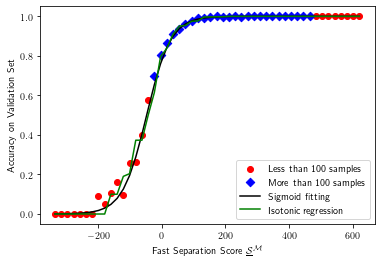

In [4]:
model_loader = ModelLoader(dataset_name='MNIST',model_name='RF',shuffle_num=0, Norm='L2')
plot_fitting_function(model_loader,n_bins=50, save = True)

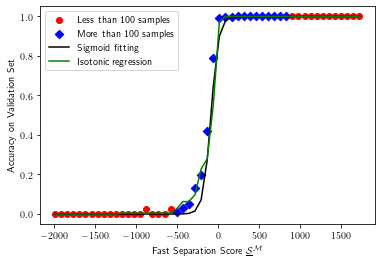

In [7]:
model_loader = ModelLoader(dataset_name='GTSRB_RGB',model_name='GB',shuffle_num=0, Norm='L2')
plot_fitting_function(model_loader,n_bins=50, save = True)